In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving DataPreprocessing.csv to DataPreprocessing.csv


In [ ]:
import io
df=pd.read_csv(io.StringIO(uploaded['DataPreprocessing.csv'].decode('utf-8')))

In [ ]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Income            1
Age               1
Online Shopper    0
Region            0
dtype: int64

In [ ]:
age=df['Age'].median
income=df['Income'].median

In [ ]:
df['Age']=df['Age'].fillna(age)

In [ ]:
df['Income']=df['Income'].fillna(income)

In [ ]:
df

,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,86400.0,1
5,1,40.0,69600.0,1
6,0,49.0,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


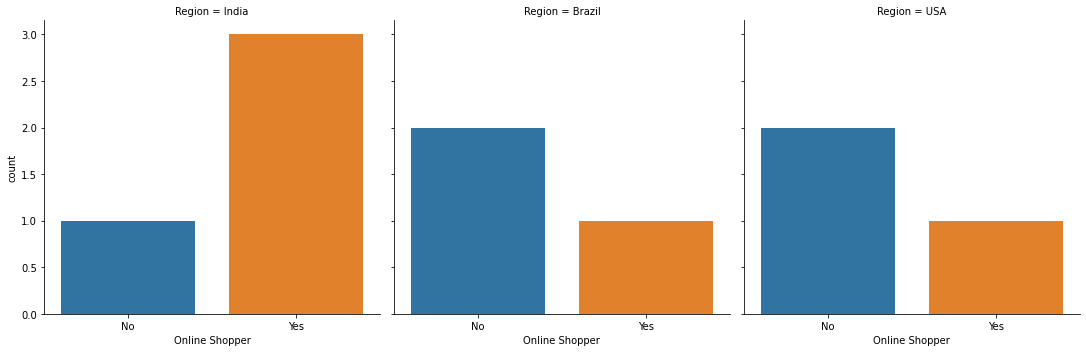

In [ ]:
sns.catplot('Online Shopper', col='Region', data=df, kind='count')

In [ ]:
df.Region.value_counts()

India     4
Brazil    3
USA       3
Name: Region, dtype: int64

In [ ]:
df['Online Shopper'].value_counts()

Yes    5
No     5
Name: Online Shopper, dtype: int64

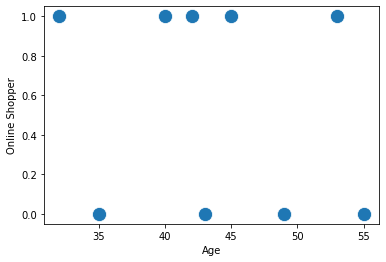

In [ ]:
sns.scatterplot(x='Age',y='Online Shopper',data=df,s=200)

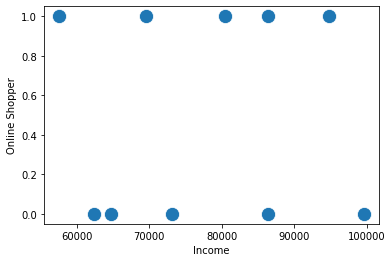

In [ ]:
sns.scatterplot(x='Income',y='Online Shopper',data=df,s=200)

In [ ]:
le=LabelEncoder()

In [ ]:
df['Online Shopper']=le.fit_transform(df['Online Shopper'])

In [ ]:
df

,Region,Age,Income,Online Shopper
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
2,2,35.0,64800.0,0
3,0,43.0,73200.0,0
4,2,45.0,86400.0,1
5,1,40.0,69600.0,1
6,0,49.0,62400.0,0
7,1,53.0,94800.0,1
8,2,55.0,99600.0,0
9,1,42.0,80400.0,1


In [ ]:
df['Region']=le.fit_transform(df['Region'])

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,Y,test_size=0.3)

In [ ]:
X_train

,Region,Age,Income,Online Shopper
4,2,45.0,86400.0,1
3,0,43.0,73200.0,0
0,1,49.0,86400.0,0
1,0,32.0,57600.0,1
9,1,42.0,80400.0,1
8,2,55.0,99600.0,0
7,1,53.0,94800.0,1


In [ ]:
s=StandardScaler()

In [ ]:
df_norm=s.fit_transform(X)

In [ ]:
df_norm

array([[ 0.        ,  0.66594688,  0.65809634],
       [-1.29099445, -1.74279715, -1.47627017],
       [ 1.29099445, -1.31772467, -0.94267854],
       [-1.29099445, -0.18419807, -0.32015498],
       [ 1.29099445,  0.09918358,  0.65809634],
       [ 0.        , -0.60927055, -0.58695079],
       [-1.29099445,  0.66594688, -1.12054242],
       [ 0.        ,  1.23271018,  1.28061991],
       [ 1.29099445,  1.51609183,  1.63634766],
       [ 0.        , -0.3258889 ,  0.21343665]])